<a href="https://colab.research.google.com/github/mburu-mwangi/Lung-Cancer-/blob/main/mass_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung cancer Analysis


In [459]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading of the Dataset

In [460]:
# Loading the dataset
url='https://drive.google.com/file/d/1hIjlEeOgcVUQQ36LcnyT1_xBNBuRE7NY/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)

In [461]:
#df_poland = pd.read_csv("covid_caner_poland.csv")

In [462]:
# Craeting a copy of the same set
df_poland =  df.copy()

In [463]:
# Checking the head of the dataset
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


In [464]:
# Creating usique identifiers of my dataset.
df_poland['unique_ID'] = [i for i in range(df_poland.shape[0])]
# Confirming the operation
df_poland.set_index('unique_ID').head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


# Data Cleaning 

In [465]:
#df_poland.to_csv('new_poland_covid_cancer.csv')

## Duplicated Values

In [466]:
# Checking for duplicated values
df_poland.duplicated().sum()

0

#### There are no duplicated values in the dataset

## Checking for missing values in the dataset

In [467]:
# Creating a function to check for percentage of missing values and put it in a dataframe
def missing_percentage(data):
  df=(data.isnull().sum()/len(data)*100)
  missing_frame=pd.DataFrame({"Column_names":df.index,"%_missing":df.values})
  return missing_frame


In [468]:
# Executing the function
missing_percentage(df_poland)

,Column_names,%_missing
0,Invasive mediastinal staging,0.000000
1,Date of surgery,0.000000
2,Approach,0.109559
3,Type of surgery,0.000000
4,Sleeve - bronchial,0.000000
5,Histology,1.054506
6,Stage,1.314708
7,Stage.1,1.314708
8,Total hospital stay,1.698165
9,Postoperative hospital stay,2.643111


#### Dealing with missing values

In [469]:
# Checking datatypes
df_poland[['Histology','Stage','Stage.1','Total hospital stay','Postoperative hospital stay']].dtypes

Histology                       object
Stage                           object
Stage.1                         object
Total hospital stay            float64
Postoperative hospital stay    float64
dtype: object

In [470]:
# A function to deal with missing values in the continous variables
def fill_miss(data,col1,col2):
  df1=data[col1].groupby(data[col2]).mean()
  if data[col2].any =='Alive':
    data[col1]=data[col1].fillna(df1[0])
  else:
    data[col1]=data[col1].fillna(df1[1])
  return data.isnull().sum()


In [471]:
# Executong the function on the total hospital stay column
fill_miss(df_poland,'Total hospital stay','Outcome at discharge')

Invasive mediastinal staging      0
Date of surgery                   0
Approach                          8
Type of surgery                   0
Sleeve - bronchial                0
Histology                        77
Stage                            96
Stage.1                          96
Total hospital stay               0
Postoperative hospital stay     193
Outcome at discharge              0
unique_ID                         0
dtype: int64

In [472]:
# Executing the function on the post operative hospital stay column
fill_miss(df_poland,'Postoperative hospital stay','Outcome at discharge')

Invasive mediastinal staging     0
Date of surgery                  0
Approach                         8
Type of surgery                  0
Sleeve - bronchial               0
Histology                       77
Stage                           96
Stage.1                         96
Total hospital stay              0
Postoperative hospital stay      0
Outcome at discharge             0
unique_ID                        0
dtype: int64

#### Dealing with missing value in the other columns

In [473]:
# Categorical column which had a missing percentage of about 1.3%
df_poland[['Histology','Stage','Stage.1']].isnull().sum()

Histology    77
Stage        96
Stage.1      96
dtype: int64

#### Dropping the missing values in the categorical columns

In [474]:
# Dropping the missing values in the  categorical columns
df_poland.dropna(axis=0,inplace=True)

In [475]:
# Calling the function to check for missing values
missing_percentage(df_poland)

,Column_names,%_missing
0,Invasive mediastinal staging,0.0
1,Date of surgery,0.0
2,Approach,0.0
3,Type of surgery,0.0
4,Sleeve - bronchial,0.0
5,Histology,0.0
6,Stage,0.0
7,Stage.1,0.0
8,Total hospital stay,0.0
9,Postoperative hospital stay,0.0


#### There are no more missing values in the dataset.

In [476]:
# Setting unique_ID as the index
df_poland = df_poland.set_index('unique_ID')

In [477]:
# Confirming the operation
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


## Checking for outliers and anomalies

In [478]:
# Checking for anomalies in the Invasive mediastinal staging column
df_poland['Invasive mediastinal staging'].unique()
# The half of the dataset is in Polish

array(['NIE', 'TAK', 'NO', 'YES'], dtype=object)

In [479]:
# Function to replace the polish words
def replacing(data,col,old,new):
  data[col]=data[col].str.replace(old,new)
  return data[col].unique()


In [480]:
# Executing the function on the first column.
replacing(df_poland,'Invasive mediastinal staging','NIE','NO')
replacing(df_poland,'Invasive mediastinal staging','TAK','YES')

array(['NO', 'YES'], dtype=object)

In [481]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


In [482]:
# Checking the unique values in the stage column
df_poland['Stage'].unique()


array(['I', 'IV', 'II', 'III'], dtype=object)

In [483]:
# Replacing the roman numbers with numerical values
vals_to_replace = {'I':1, 'IV':4, 'II':2, 'III':3}
df_poland['Stage'] = df_poland['Stage'].map(vals_to_replace)

# Confirming the operation
df_poland['Stage'].unique()

array([1, 4, 2, 3])

### Anomalies and Outliers in the continous variables.

In [484]:
# Checking the datatypes
df_poland.dtypes

Invasive mediastinal staging     object
Date of surgery                   int64
Approach                         object
Type of surgery                  object
Sleeve - bronchial               object
Histology                        object
Stage                             int64
Stage.1                          object
Total hospital stay             float64
Postoperative hospital stay     float64
Outcome at discharge             object
dtype: object

#### Anomalies in the numerical values

In [485]:
# Checking for anomalies in the Postoperative hospital stay 
df_poland['Postoperative hospital stay'].unique()

array([  7.        ,   3.        ,   5.        ,   4.        ,
        12.        , 146.        ,  14.        ,  11.        ,
         6.        ,  15.        ,   8.        ,  22.76315789,
        18.        ,  43.        ,  13.        ,  30.        ,
        19.        ,  25.        ,  10.        ,  32.        ,
         2.        ,  16.        ,   9.        ,  22.        ,
        28.        ,  54.        ,  23.        ,  41.        ,
        20.        ,  29.        ,  21.        ,  76.        ,
        27.        ,  17.        ,  36.        ,  47.        ,
        70.        ,   1.        ,  85.        ,  34.        ,
        62.        ,  33.        ,  42.        ,  24.        ,
        44.        ,  48.        ,  40.        ,  35.        ,
        31.        ,  26.        ,  50.        ,  46.        ,
        37.        ,  53.        ,  45.        , 190.        ,
        96.        ,  52.        ,  68.        ,  78.        ,
        49.        ,  67.        ,  39.        ,  64.  

In [486]:
# Checking for anomalies in the Total hospital stay set
df_poland['Total hospital stay'].unique()

array([  8.        ,   6.        ,   5.        ,  31.        ,
       160.        ,  17.        ,  10.        ,  26.        ,
         4.        ,   7.        ,  11.        ,  26.01298701,
        21.        ,  22.        ,  12.        ,  14.        ,
        13.        ,  18.        ,  76.        ,  20.        ,
         9.        ,  48.        ,  35.        ,  29.        ,
        42.        ,   3.        ,  19.        ,  27.        ,
        15.        ,  23.        ,  32.        ,  40.        ,
        64.        ,  43.        , 103.        ,  28.        ,
        30.        ,  16.        ,  88.        ,  37.        ,
        77.        ,  25.        ,  24.        ,  34.        ,
        57.        ,  50.        ,  67.        ,  91.        ,
       102.        ,  49.        ,  63.        ,  39.        ,
        46.        ,  36.        ,  75.        ,  51.        ,
        33.        , 116.        ,  56.        ,  47.        ,
        61.        ,  38.        ,  54.        ,  93.  

#### There were anomalies in both columns in that the days were expressed in decimal form which is an anomally.

In [487]:
# A function to round off values in both columns to remove the decimals
def rounding(data,col):
  data[col]=data[col].apply(np.ceil)
  return data[col].unique()

In [488]:
# Rounding the values
rounding(df_poland,'Total hospital stay')

array([  8.,   6.,   5.,  31., 160.,  17.,  10.,  26.,   4.,   7.,  11.,
        27.,  21.,  22.,  12.,  14.,  13.,  18.,  76.,  20.,   9.,  48.,
        35.,  29.,  42.,   3.,  19.,  15.,  23.,  32.,  40.,  64.,  43.,
       103.,  28.,  30.,  16.,  88.,  37.,  77.,  25.,  24.,  34.,  57.,
        50.,  67.,  91., 102.,  49.,  63.,  39.,  46.,  36.,  75.,  51.,
        33., 116.,  56.,  47.,  61.,  38.,  54.,  93., 190.,  97.,  44.,
        45.,  58.,   2., 177.,  41.,  78., 195.,  68.,  53.,  62.,  79.,
        74.,  52.,  59., 162.,  89., 181., 175.,  81.,  82.,  98., 150.,
        71.,  94., 128.])

In [489]:
# Rounding the values in the post operative hospital stay columns
rounding(df_poland,'Postoperative hospital stay')

array([  7.,   3.,   5.,   4.,  12., 146.,  14.,  11.,   6.,  15.,   8.,
        23.,  18.,  43.,  13.,  30.,  19.,  25.,  10.,  32.,   2.,  16.,
         9.,  22.,  28.,  54.,  41.,  20.,  29.,  21.,  76.,  27.,  17.,
        36.,  47.,  70.,   1.,  85.,  34.,  62.,  33.,  42.,  24.,  44.,
        48.,  40.,  35.,  31.,  26.,  50.,  46.,  37.,  53.,  45., 190.,
        96.,  52.,  68.,  78.,  49.,  67.,  39.,  64.,  91.,  86.,  97.,
       126.,  51.])

In [490]:
# Checking for numerical values in the dataset
numerical_cols = [col for col in df_poland if df_poland[col].dtypes !='O']
numerical_cols

['Date of surgery',
 'Stage',
 'Total hospital stay',
 'Postoperative hospital stay']

### Outliers in numerical variables

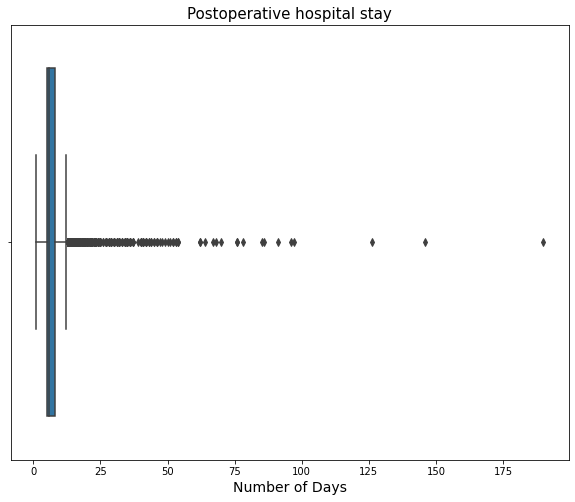

In [491]:
# Boxplot of the Postoperative Hospital 
plt.figure(figsize=(10,8))
plt.title('Postoperative hospital stay',fontsize=15)
sns.boxplot(x=df_poland['Postoperative hospital stay'])
plt.xlabel('Number of Days',fontsize=14)
plt.show()

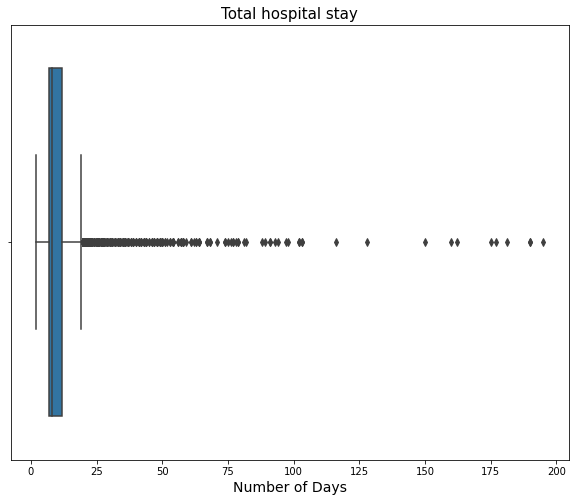

In [492]:
# Boxplot of the Total hospital stay 
plt.figure(figsize=(10,8))
plt.title('Total hospital stay',fontsize=15)
sns.boxplot(x=df_poland['Total hospital stay'])
plt.xlabel("Number of Days",fontsize=14)
plt.show()

In [493]:
df_poland['Type of surgery'].unique()

array(['Lobectomy', 'Pneumonectomy', 'Bilobectomy', 'Wedge resection',
       'Segmentectomy', 'Wyci?cie mankietu oskrzela'], dtype=object)

In [494]:
df_poland['Type of surgery'].value_counts()

Lobectomy                     5455
Segmentectomy                  590
Pneumonectomy                  451
Bilobectomy                    348
Wedge resection                340
Wyci?cie mankietu oskrzela      15
Name: Type of surgery, dtype: int64

In [495]:
replacing(df_poland,'Type of surgery','Wyci?cie mankietu oskrzela','Broncial cuff excision')# Remember to replace

array(['Lobectomy', 'Pneumonectomy', 'Bilobectomy', 'Wedge resection',
       'Segmentectomy', 'Wyci?cie mankietu oskrzela'], dtype=object)

In [496]:
# Exporting to CSV
df_poland.to_csv("Clean dataset.csv",index=False)

## Exploratory Data Analysis

1. Univariate Analysis

In [497]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


In [498]:
objects= [cols for cols in df_poland if df_poland[cols].dtypes=='O']
objects

['Invasive mediastinal staging',
 'Approach',
 'Type of surgery',
 'Sleeve - bronchial',
 'Histology',
 'Stage.1',
 'Outcome at discharge']

#### The number of patients that underwent invasive medistinal staging were more than those that didnt.

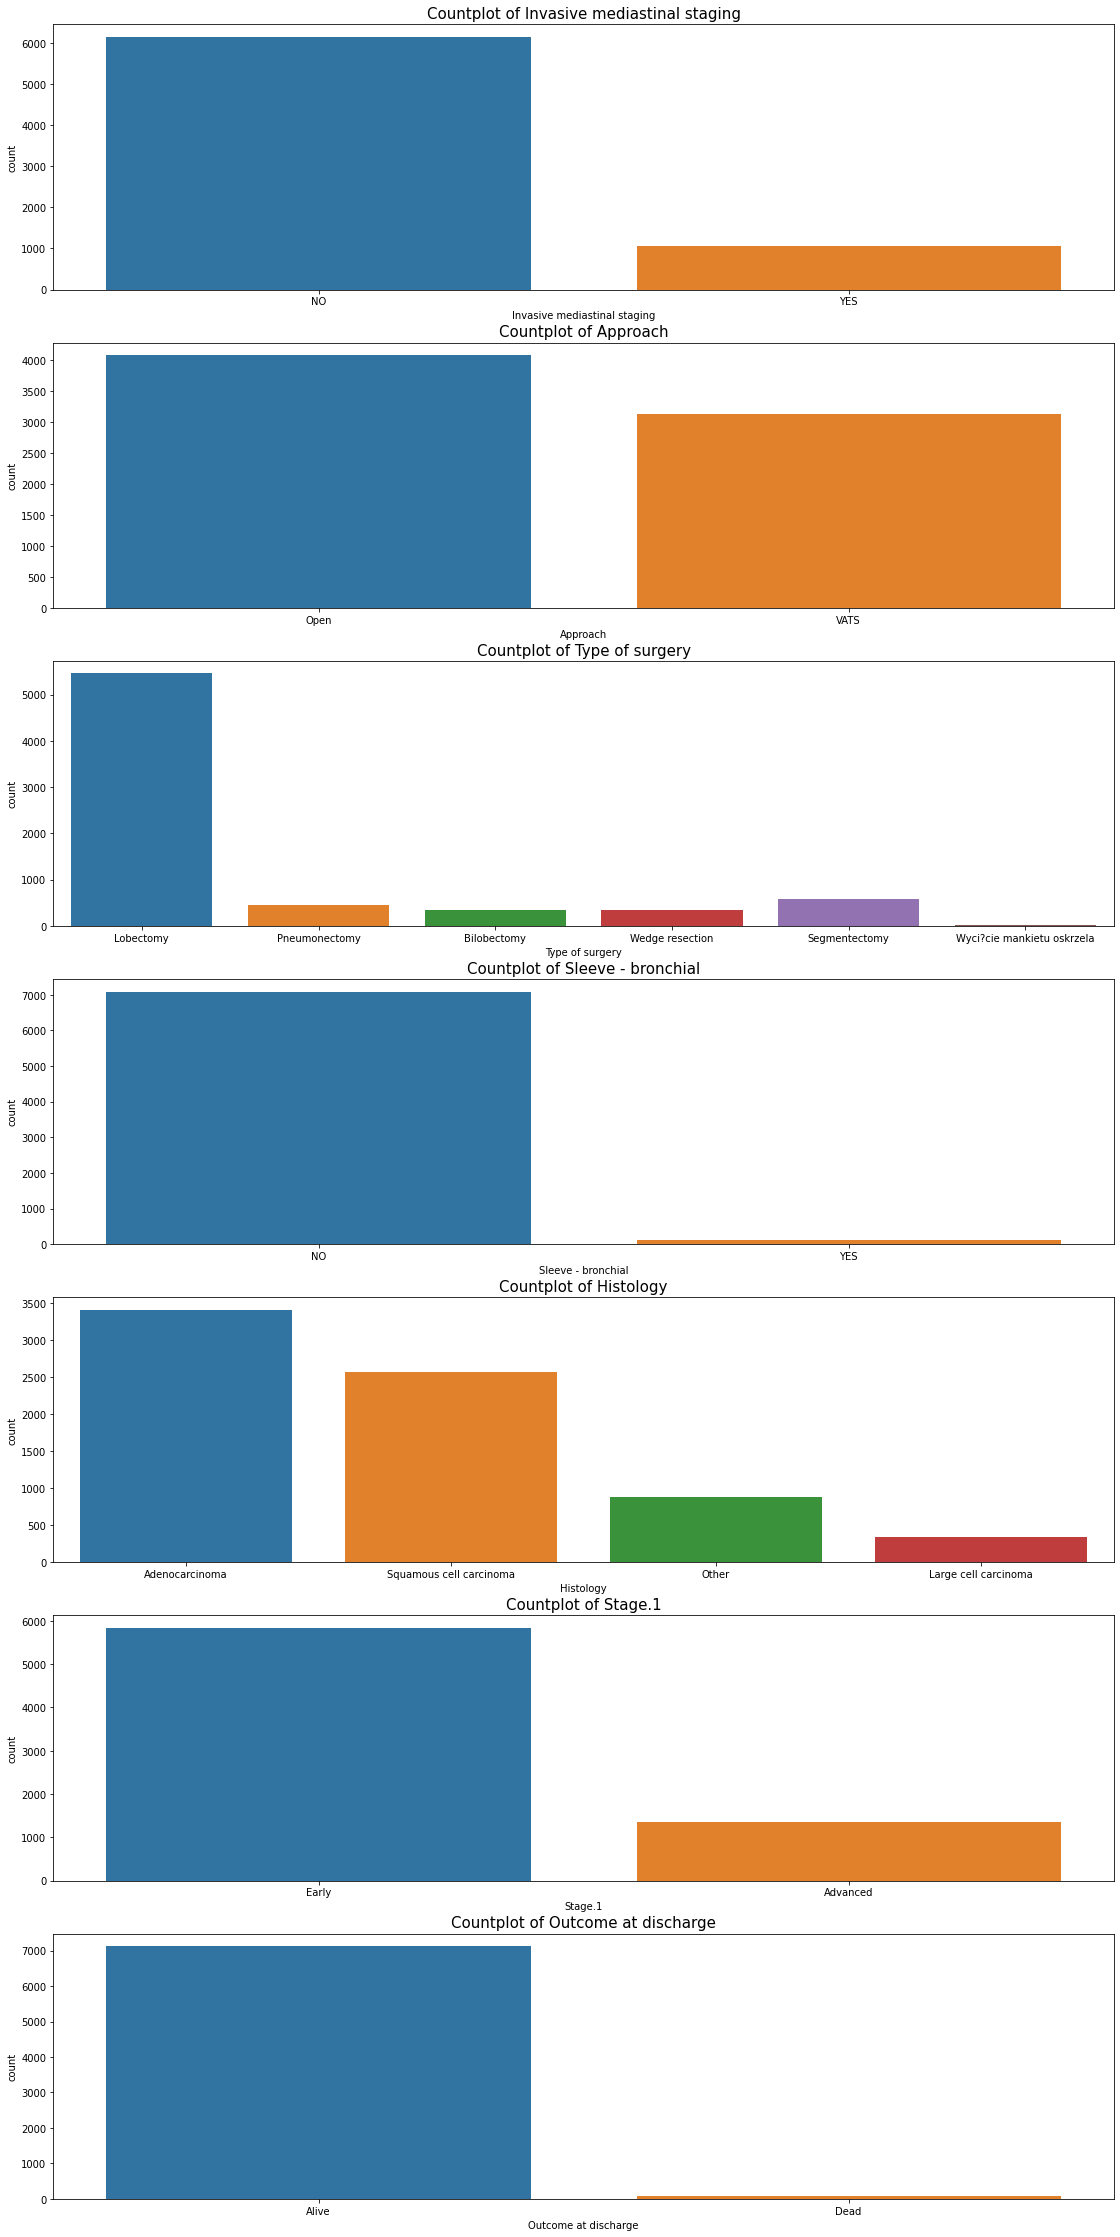

In [499]:
fig,ax=plt.subplots(len(objects),figsize=(19,40))
for i, col_vals in enumerate(objects):
  sns.countplot(x=df_poland[col_vals],ax=ax[i])
  ax[i].set_title("Countplot of "+format(col_vals),fontsize=15)
plt.show()

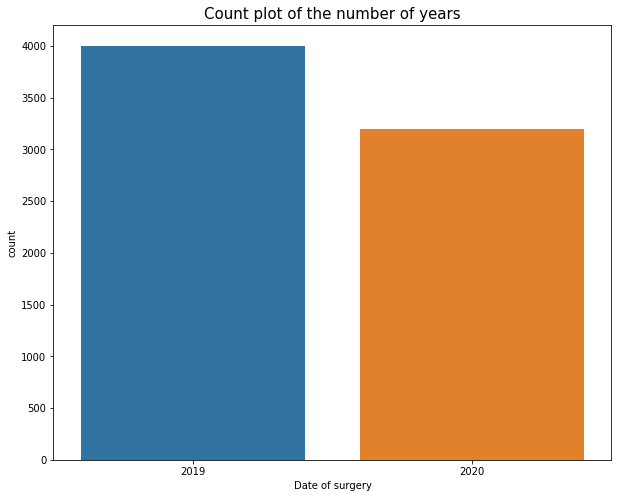

In [500]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_poland['Date of surgery'])
plt.title("Count plot of the number of years",fontsize=15)
plt.show()

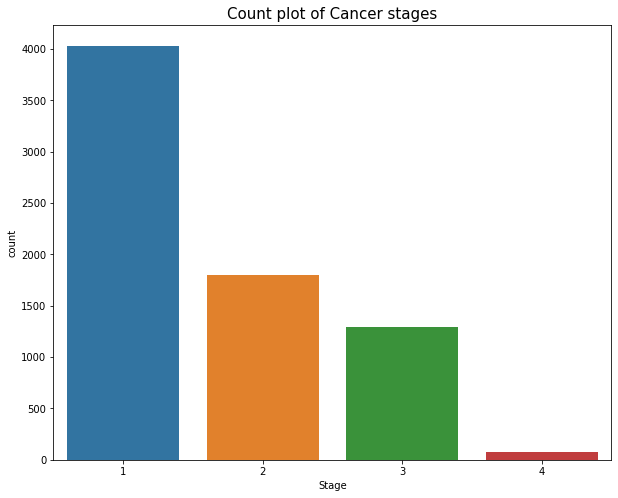

In [501]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_poland['Stage'])
plt.title("Count plot of Cancer stages",fontsize=15)
plt.show()

*  Fewer patients underwent invasive medialstinal staging as compared to those that underwent.
*  Open surgery was done frequently as compared to the Video-assisted thoracoscopic surgery
* The leading count of surgery types was lobectomy followed closely by segmentectomy. This could be attributed to the simplicity in the  prpceedures.
* A lot of patients presented with Adenocarcinoma as compared to other types of cancers.
* Patients at early stages were found in the observations as compared to those at advanced stages.
* Alive patients were more than dead patients.

### Continous Variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


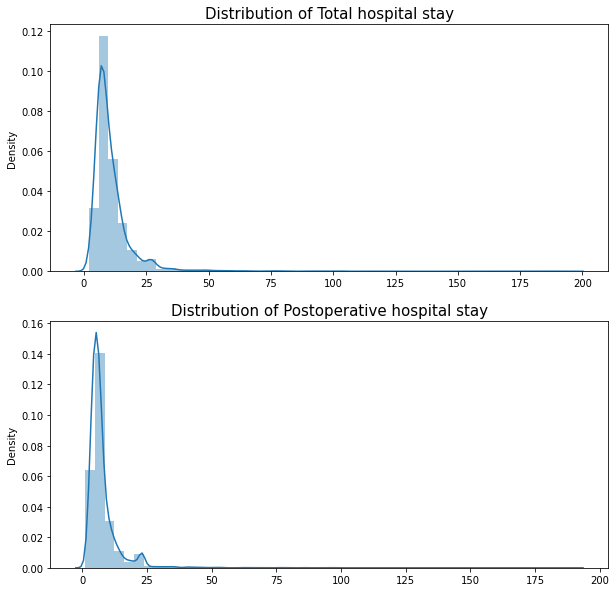

In [502]:
num_cols=['Total hospital stay','Postoperative hospital stay']
fig,ax=plt.subplots(len(num_cols),figsize=(10,10))
for i, col_vals in enumerate(num_cols):
  sns.distplot(x=df_poland[col_vals],ax=ax[i],kde=True)
  ax[i].set_title("Distribution of "+format(col_vals),fontsize=15)
plt.show()

From the distribution plot we get to see that most people did not spend time in the hospital as our distribution is skewed positively . However , some outliers are seen to be at the 3rd quantile where some patients spent more than 200 days in the hospital.

## Bivariate Analysis.

### This is meant to help us understand the relationships within our dataset.

In [503]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


# Research Questions
####  * What was the reliability of open surgery as compare to Video assisted surgery considering the post discharge Outcome?


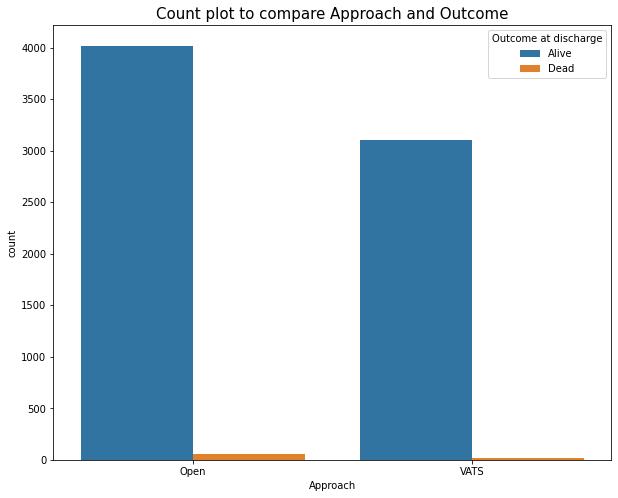

In [504]:
# Assesing the relationship between The suregery approach to the discharge outcome
plt.figure(figsize=(10,8))
sns.countplot(x='Approach',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to compare Approach and Outcome",fontsize=15)
plt.show()

#### * Patients who underwent open surgeries had a higher death count as compared to patients that underwent Video assisted thoracoscopic surgery.

## What is the effectiveness of invasive mediastinal staging considering the patient's outcome after discharge?

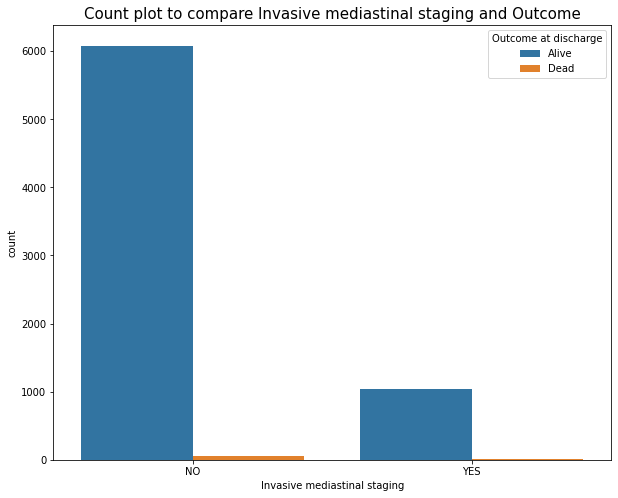

In [505]:
# Asessing the relationship between patients that underwent invasive mediastinal staging and its outcome
plt.figure(figsize=(10,8))
sns.countplot(x='Invasive mediastinal staging',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to compare Invasive mediastinal staging and Outcome",fontsize=15)
plt.show() 

* As much as there are a greater number of people who were alive after discharge,the people who didnt undergo the Invasive mediastinal staging had a higher death count as compared to those who underwent. 

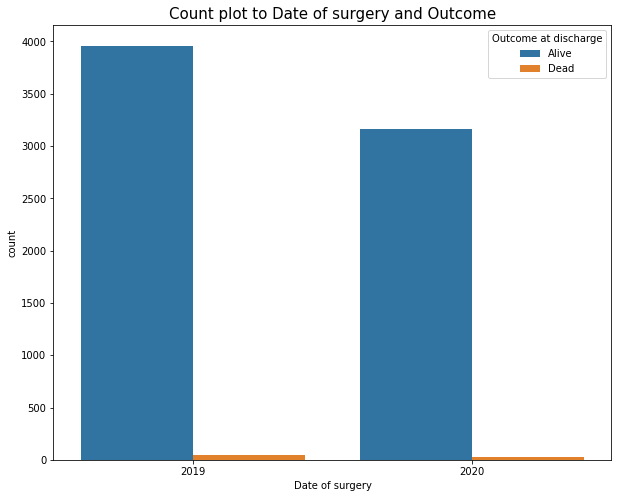

In [506]:
# A plot of the relationship between Date of surgery and Outcome
plt.figure(figsize=(10,8))
sns.countplot(x='Date of surgery',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to Date of surgery and Outcome",fontsize=15)
plt.show()

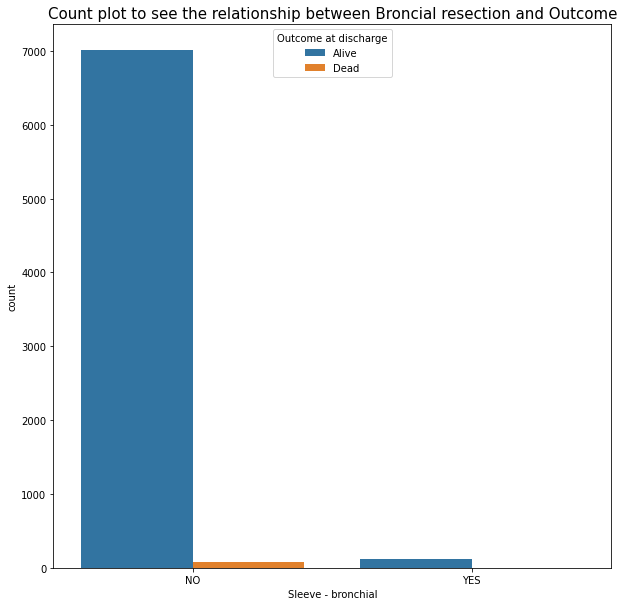

In [507]:
# A plot to assess the relationship between Broncial resection and Outcome
plt.figure(figsize=(10,10))
sns.countplot(x='Sleeve - bronchial',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to see the relationship between Broncial resection and Outcome",fontsize=15)
plt.show()

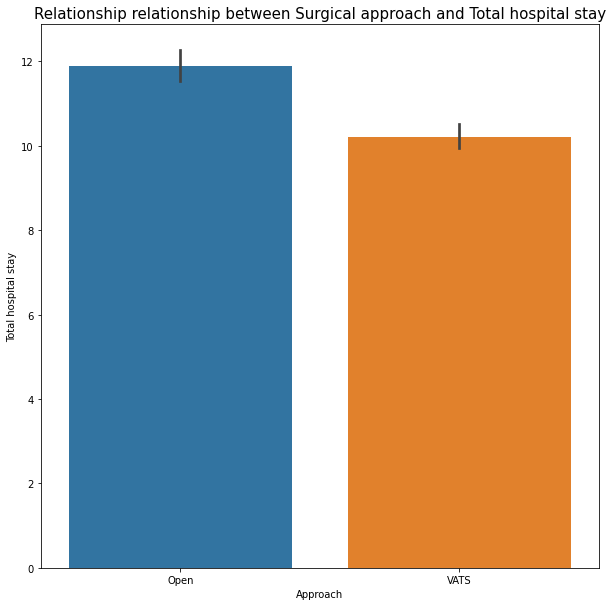

In [508]:
plt.figure(figsize=(10,10))
sns.barplot(x='Approach',y='Total hospital stay',data=df_poland)
plt.title("Relationship relationship between Surgical approach and Total hospital stay",fontsize=15)
plt.show()

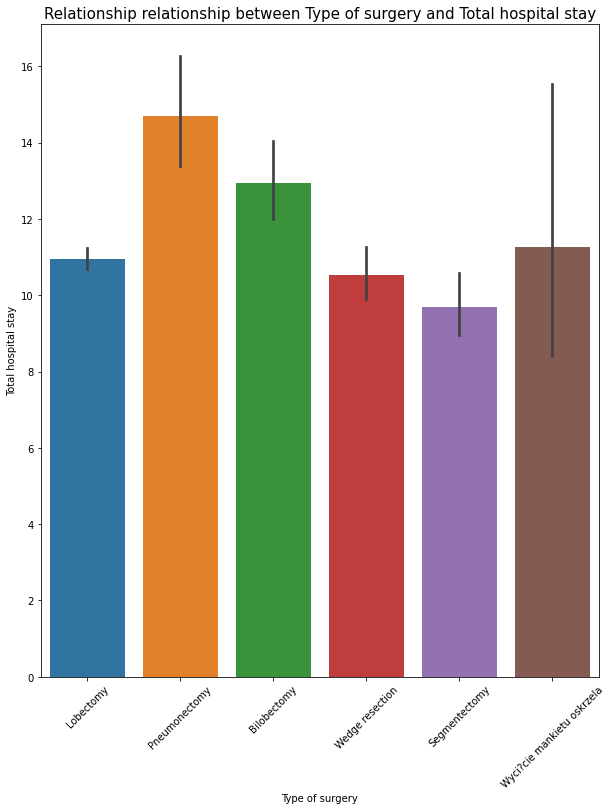

In [509]:
plt.figure(figsize=(10,12))
sns.barplot(x='Type of surgery',y='Total hospital stay',data=df_poland)
plt.title("Relationship relationship between Type of surgery and Total hospital stay",fontsize=15)
plt.xticks (rotation=45)
plt.show()

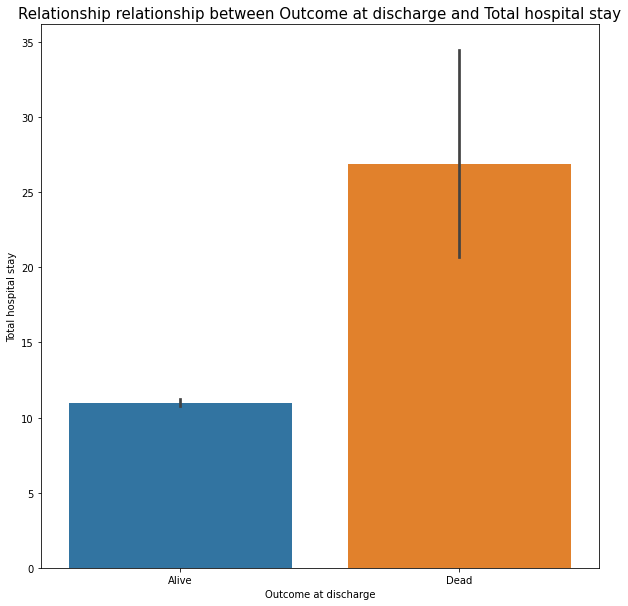

In [510]:
plt.figure(figsize=(10,10))
sns.barplot(x='Outcome at discharge',y='Total hospital stay',data=df_poland)
plt.title("Relationship relationship between Outcome at discharge and Total hospital stay",fontsize=15)
plt.show()

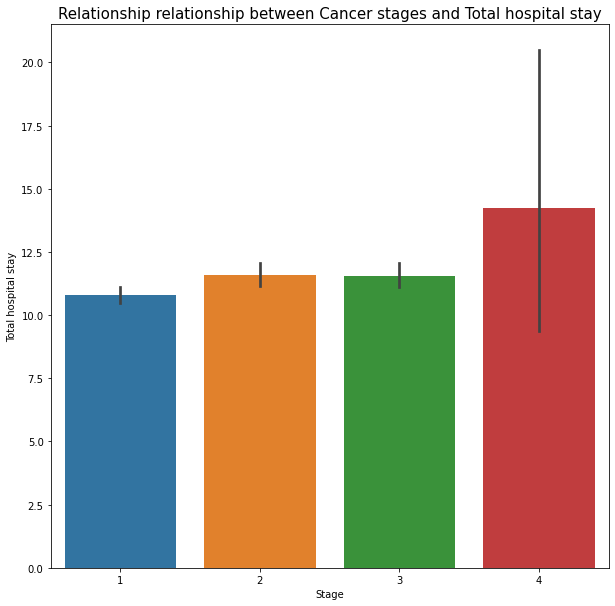

In [511]:
plt.figure(figsize=(10,10))
sns.barplot(x='Stage',y='Total hospital stay',data=df_poland)
plt.title("Relationship relationship between Cancer stages and Total hospital stay",fontsize=15)
plt.show()

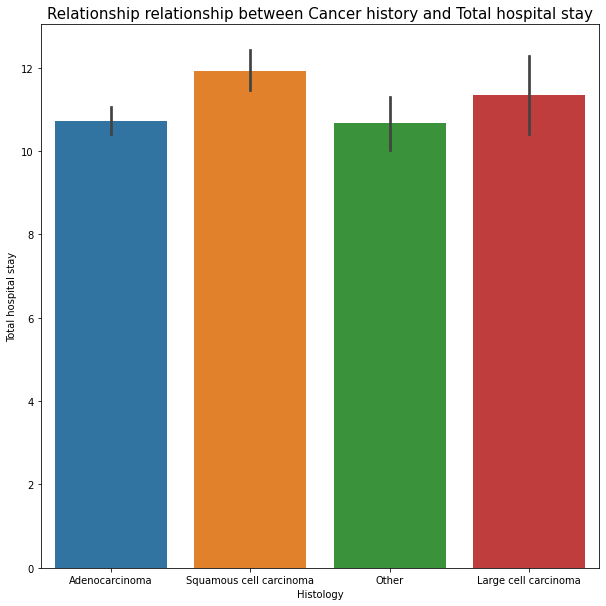

In [512]:
plt.figure(figsize=(10,10))
sns.barplot(x='Histology',y='Total hospital stay',data=df_poland)
plt.title("Relationship relationship between Cancer history and Total hospital stay",fontsize=15)
plt.show()

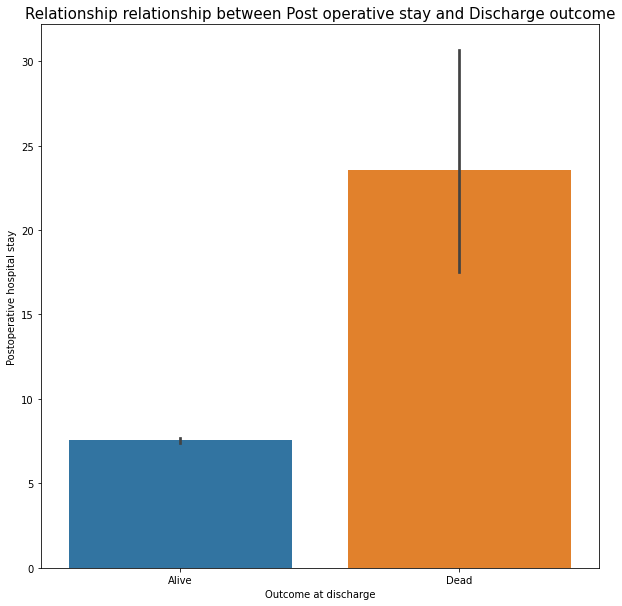

In [513]:
plt.figure(figsize=(10,10))
sns.barplot(x='Outcome at discharge',y='Postoperative hospital stay',data=df_poland)
plt.title("Relationship relationship between Post operative stay and Discharge outcome",fontsize=15)
plt.show()

# Multivariate Analysis

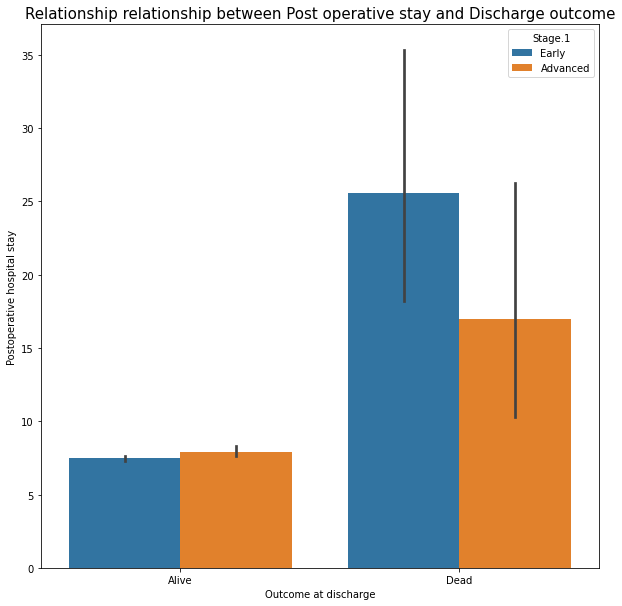

In [514]:
plt.figure(figsize=(10,10))
sns.barplot(x='Outcome at discharge',y='Postoperative hospital stay',hue='Stage.1',data=df_poland)
plt.title("Relationship relationship between Post operative stay and Discharge outcome",fontsize=15)
plt.show()

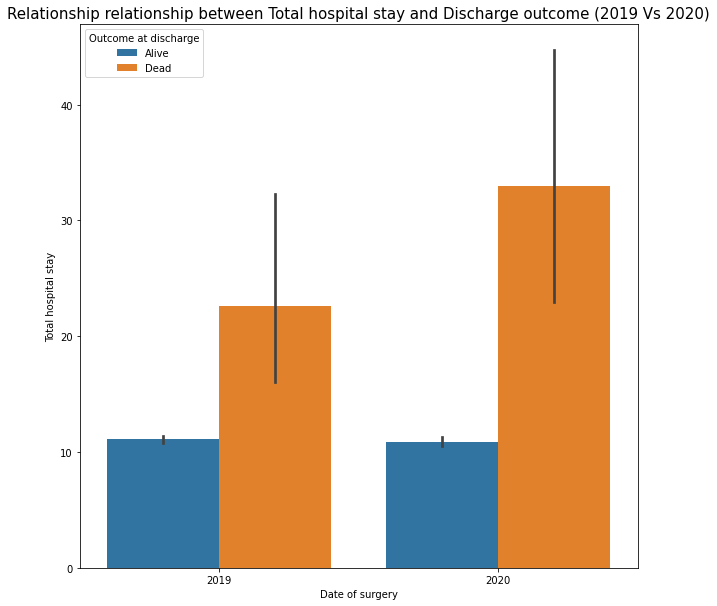

In [515]:
plt.figure(figsize=(10,10))
sns.barplot(x='Date of surgery',y='Total hospital stay',hue='Outcome at discharge',data=df_poland)
plt.title("Relationship relationship between Total hospital stay and Discharge outcome (2019 Vs 2020)",fontsize=15)
plt.show()

# Implementing the solution.


## Feature Engineering.

In [516]:
# viewing the clean dataset
#
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


In [517]:
# getting the variables to encode 
#
objects

['Invasive mediastinal staging',
 'Approach',
 'Type of surgery',
 'Sleeve - bronchial',
 'Histology',
 'Stage.1',
 'Outcome at discharge']

In [518]:
# 
# new_cols = pd.get_dummies(df_poland[['Type of surgery','Histology']],drop_first= True)
# new_cols

In [519]:
#
#
from sklearn.preprocessing import LabelEncoder
cols = ['Invasive mediastinal staging','Sleeve - bronchial','Stage.1','Outcome at discharge','Approach']

le = LabelEncoder()
for col in cols: 
  le.fit(df_poland[col])
  df_poland[col] = le.transform(df_poland[col])
df_poland


,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,0,2019,0,Lobectomy,0,Adenocarcinoma,1,1,8.0,7.0,0
1,0,2019,1,Lobectomy,0,Squamous cell carcinoma,4,0,6.0,3.0,0
2,0,2019,0,Lobectomy,0,Adenocarcinoma,1,1,8.0,5.0,0
3,0,2019,0,Lobectomy,0,Squamous cell carcinoma,1,1,6.0,4.0,0
4,1,2019,0,Lobectomy,0,Adenocarcinoma,1,1,5.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
7297,0,2020,1,Lobectomy,0,Adenocarcinoma,1,1,7.0,6.0,0
7298,0,2020,1,Lobectomy,0,Adenocarcinoma,1,1,6.0,5.0,0
7299,0,2020,0,Lobectomy,0,Squamous cell carcinoma,2,1,7.0,6.0,0


In [520]:
df_poland.columns

Index(['Invasive mediastinal staging', 'Date of surgery', 'Approach',
       'Type of surgery', 'Sleeve - bronchial', 'Histology', 'Stage',
       'Stage.1', 'Total hospital stay', 'Postoperative hospital stay',
       'Outcome at discharge'],
      dtype='object')

In [521]:
#
dummy = pd.get_dummies(df_poland['Histology'], drop_first= True)


In [522]:
#
dummy2 = pd.get_dummies(df_poland['Type of surgery'], drop_first= True)

In [523]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,0,2019,0,Lobectomy,0,Adenocarcinoma,1,1,8.0,7.0,0
1,0,2019,1,Lobectomy,0,Squamous cell carcinoma,4,0,6.0,3.0,0
2,0,2019,0,Lobectomy,0,Adenocarcinoma,1,1,8.0,5.0,0
3,0,2019,0,Lobectomy,0,Squamous cell carcinoma,1,1,6.0,4.0,0
4,1,2019,0,Lobectomy,0,Adenocarcinoma,1,1,5.0,4.0,0


In [525]:
df_poland_new = pd.concat([df_poland, dummy,dummy2], axis = 1).drop(df_poland[["Type of surgery","Histology"]],axis = 1)
df_poland_new.head()

,Invasive mediastinal staging,Date of surgery,Approach,Sleeve - bronchial,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge,Large cell carcinoma,Other,Squamous cell carcinoma,Lobectomy,Pneumonectomy,Segmentectomy,Wedge resection,Wyci?cie mankietu oskrzela
unique_ID,,,,,,,,,,,,,,,,,
0,0,2019,0,0,1,1,8.0,7.0,0,0,0,0,1,0,0,0,0
1,0,2019,1,0,4,0,6.0,3.0,0,0,0,1,1,0,0,0,0
2,0,2019,0,0,1,1,8.0,5.0,0,0,0,0,1,0,0,0,0
3,0,2019,0,0,1,1,6.0,4.0,0,0,0,1,1,0,0,0,0
4,1,2019,0,0,1,1,5.0,4.0,0,0,0,0,1,0,0,0,0


In [527]:
x = df_poland_new.drop("Total hospital stay", axis = 1)
Y = df_poland_new['Total hospital stay']

In [532]:
# Checking for multicollinearity
#
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Feat"] = x.columns
vif

,Factor,Feat
0,1.200298,Invasive mediastinal staging
1,83.395633,Date of surgery
2,2.009439,Approach
3,1.039424,Sleeve - bronchial
4,19.217354,Stage
5,19.046199,Stage.1
6,2.436358,Postoperative hospital stay
7,1.070571,Outcome at discharge
8,1.109500,Large cell carcinoma
9,1.277094,Other


In [535]:
x2 = x.drop(columns = ["Date of surgery","Stage.1","Lobectomy"], axis = 1)


In [536]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif["Feat"] = x2.columns
vif

,Factor,Feat
0,1.187035,Invasive mediastinal staging
1,1.485239,Approach
2,1.037743,Sleeve - bronchial
3,2.762076,Stage
4,2.106628,Postoperative hospital stay
5,1.067717,Outcome at discharge
6,1.097641,Large cell carcinoma
7,1.201048,Other
8,1.684765,Squamous cell carcinoma
9,1.180579,Pneumonectomy


In [545]:
def extra_tree_regressor(x,Y):
  
    from sklearn.ensemble import ExtraTreesRegressor

    model = ExtraTreesRegressor()

    model.fit(x,Y)

    model_import = model.feature_importances_
    print(model_import)
    feat_imp = pd.Series(model.feature_importances_, index=x.columns)

    feat_imp.nlargest(13).plot.barh(figsize = (10,8))

    plt.title("Feature Importance")
    
    plt.show()

[6.68713490e-03 1.85503977e-02 1.97348930e-03 7.72328287e-02
 8.18303934e-01 4.10919783e-03 4.89797800e-03 1.65778448e-02
 1.78327697e-02 2.11936483e-02 1.04188748e-02 2.14652434e-03
 7.53781083e-05]


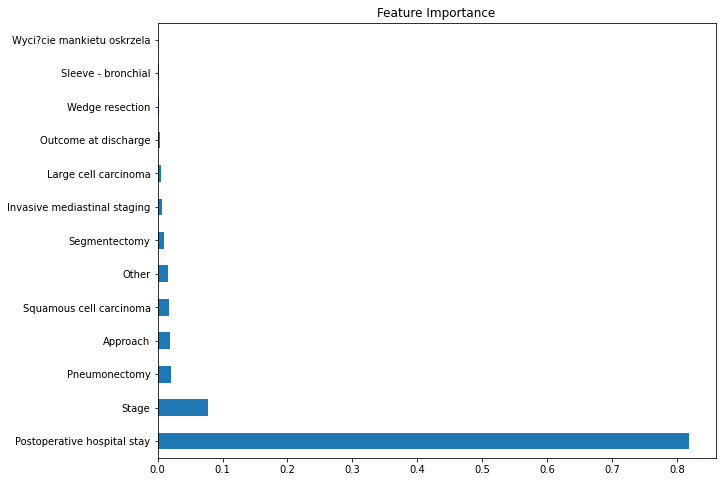

In [546]:
extra_tree_regressor(x2,Y)

In [548]:
# dropping the least important features
#
x3 = x2.drop(columns = ["Wyci?cie mankietu oskrzela","Sleeve - bronchial","Wedge resection","Outcome at discharge"], axis = 1)

### Baseline model

In [550]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# splitting to test and train sets 
#
x_train, x_test, Y_train, Y_test = train_test_split(x3,Y,test_size=0.2,random_state = 0)

# Calling the regressor
#
regr = RandomForestRegressor(n_estimators = 500 , random_state = 0)

# Fitting the model
#
regr.fit(x_train,Y_train)

# Predicting the total number of days 
#
Y_pred = regr.predict(x_test)

from sklearn.metrics import mean_squared_error

# Calculating the RMSE
#
RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(RMSE)

6.933394904200383


### Optimization of our baseline model

In [552]:
# Tuning of the hyperparameters
#
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
metrics.SCORERS.keys

In [557]:

rf = RandomForestRegressor()

# obtaining the param grid
#
param_grid = {
     'max_depth': [3,5,10],
     'max_features': [2,3,5],
     'min_samples_leaf': [3,4,5],
     'min_samples_split': [4,6,8],
     'n_estimators': [200,300,500]
 }

 # performing grid search
 #
from sklearn.model_selection import GridSearchCV  
forest_search = GridSearchCV(estimator = rf , param_grid = param_grid, scoring = "r2", cv = 3, verbose = 1)
forest_search.fit(x_train, Y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [200, 300, 500]},
             scoring='r2', verbose=1)

In [558]:
my_params= forest_search.best_params_
my_params

{'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 500}

In [560]:
# Best Estimator
#
best_model = forest_search.best_estimator_
Y_pred_optimum = best_model.predict(x_test)
RMSE1 = np.sqrt(mean_squared_error(Y_test, Y_pred_optimum))
print(RMSE1)

6.930242051770278


### Optimizing using SVM

In [562]:
# Normalizing our features
#
x_train, x_test, Y_train, Y_test = train_test_split(x3,Y,test_size=0.2,random_state = 42)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [563]:
from sklearn.svm import SVC
# using svc regressor to tune hyperparameters
#
svm = SVC()
# Obtaining the param grig
param_grid_svm = {'C': [0.1,1,10,100,1000],
                    'gamma': [1,0.1,0.01,0.001,0.0001],
                    'kernel': ['rbf']}

svm_search=GridSearchCV(estimator=svm,
                           param_grid=param_grid_svm,
                           scoring="neg_mean_squared_error",
                           n_jobs=1,cv=5,verbose=1)
svm_search.fit(x_train, Y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [564]:
m_params = svm_search.best_estimator_
m_params

SVC(C=100, gamma=0.001)

In [566]:
# Best Estimator
#
best_model2 = svm_search.best_estimator_
Y_pred_optimum2 = best_model2.predict(x_test)
RMSE3 = np.sqrt(mean_squared_error(Y_test, Y_pred_optimum2))
print(RMSE3)

6.541958592212445


The error could be attributed to the outliers in the total number of days spent in the hospital---------------------> 

### Clustering
